# Assignment 2

The purpose of this assignment is to test your understanding of Classification.  You will use the Titanic dataset and your goal is to predict whether a passenger Survives based on the passenger's features.


# Instructions

## General

1. Use the same train  dataset as was used in the lecture.  Instructions below for where to find them.

2. As usual: your grade depends on **both** the correct answer and properly presenting your process (as in the "Recipe" taught in class, and the Geron book Appendix B)

3. You will classify whether a passenger Survives or not using Logistic Regression.

4. You may use the code presented in class to **start** your assignment but I expect you to significantly enhance it.  For example: you may use my code to get you started with plotting but it is up to you to decide whether this alone suffices.

5. Use 5-fold cross validation for all models.  Report the average as your result.


## Specific goals to address

1. Use a baseline model against which you will compare your models.
    - Discuss your choice.  Is this the best baseline model to use ?
    - Create a variable SCORE_BASELINE that contains a Python scalar value: the accuracy for your baseline model.
2. You will conduct several experiments 
    - present a Confusion Matrix for each experiment and discuss
    - you will create several variables per experiment that will be used for grading.
        - The variables for experiment 1 will have suffix "_1". For experiment 2, they will have suffix "_2", etc.
3. Experiment 1
    - You will *extend* the results presented in the lecture
        - use the same features
        - use the same way of dealing with missing features
        - be sure to treat categorical features correctly
     
    - Create a variable SCORE_1 that contains a Python scalar value: the accuracy for your experiment.
    - Create a variable MISCLASSIFIED_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the identity of passengers that were mis-classified as Surviving.
        - the "identity" of a passenger should be given as the  *row number* within the unshuffled **train** data set,
        - The first row is considered row 0
    - Create a variable MISCLASSIFIED_NOT_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the "identity" of passengers that were mis-classified as Not Surviving.
        - The "identity" of a passenger should be given as the  *row number* within the unshuffled **train** data set, as above
4. Experiment 2
    - Turn Age from a continous variable to one that is assigned to buckets.
        - You will decide the range for each bucket.  Discuss your choice
        - Treat the buckets as categorical features
    - Compare your prediction to the previous experiment and discuss
    - Create variables SCORE_2, MISCLASSIFIED_SURVIVE_2, MISCLASSIFIED_NOT_SURVIVE_2 analagous to the variables in Experiment 1
        
The correctness part of your grade will depend on the values you assign to these variables.    

# Extra credit

Create your own Logistic Regression model for the Titanic dataset given !
- Feel free to change **anything**, e.g., features or ways to treat missing values
- We will create a hidden test dataset
- Students whose model accuracy (evaluated on the hidden test dataset) are in the Top 33% of the class get extra credit !


# Getting the data 
You may obtain the train and test datasets from the repository using code from the following cell.

**NOTE** You may need to change the NOTEBOOK_ROOT variable to point to the directory into which you've cloned the repository.  On my machine, it is `~/Notebooks/NYU`.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

TITANIC_PATH = "external/jack-dies/data"

train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data  = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv")  )

# Plotting data and getting a brief view of data

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.iloc[14,:]

PassengerId                                      15
Survived                                          0
Pclass                                            3
Name           Vestrom, Miss. Hulda Amanda Adolfina
Sex                                          female
Age                                              14
SibSp                                             0
Parch                                             0
Ticket                                       350406
Fare                                         7.8542
Cabin                                           NaN
Embarked                                          S
Name: 14, dtype: object

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
(num_obs, num_features) = train_data.shape
print("There are {nr} observations and {nf} attributes (including the target)".format(nr=num_obs, nf=num_features) )

There are 891 observations and 12 attributes (including the target)


As shown above, we have 10 raw features and 1 label (exlucidng Passenger ID)

**Meaning of the attributes**

The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.We use this as label
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

Examining datatype and missing value is also important step to know better about the raw data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Missing value and Nonnumerical data**

Easily, we can find that **Age** , **Embarked** and **Cabin** have missing value. Also, **Cabin** have a large porpotion of missing, while **Embarked** only have 2 missing values

And **Name**, **sex**, **ticket**, **Cabin** and **Embarked** are objects. These need to be transformed.

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Using the plotting function seen in class** 

In [8]:
def plot_attrs(df, attrs, attr_type="Cat", normalize=True, plot=True):
    """
    Plot/print the distribution of one or more attributes of DataFrame
    
    Parameters
    ----------
    df: DataFrame
    attrs: List of attributes (i.e., column names)
    
    Optional
    --------
    attr_type: String; 
      "Cat" to indicate that the attributes in attrs are Categorical (so use value_counts)
      Otherwise: the attributes must be numeric columns (so use histogram)
    """
    num_attrs = len(attrs)
    ncols=2
    nrows = max(1,round(num_attrs/ncols))
    if num_attrs==1:
        fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(4, num_attrs*3))
    else:
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_attrs*3))
    # Make sure axes is an array (special case when num_attrs==1)
    if num_attrs == 1:
        axes =np.array( [ axes ])
        
    for i, attr in enumerate(attrs):
        if attr_type == "Cat":
            alpha_bar_chart = 0.55
            plot_data = df.loc[:, attr ].value_counts(normalize=normalize).sort_index()
            
            args = { "kind":"bar" } #, "alpha":alpha_bar_chart}
            kind="bar"
        else:
            plot_data = df.loc[:, [attr] ]
            
            args = { "kind":"hist"}
            if normalize:
                args["density"] = True
            kind="hist"
            
        if plot:
            _ = plot_data.plot(title=attr, ax=axes.flatten()[i], **args)
        else:
            print(attr + "\n")
            print(plot_data)
            print("\n")

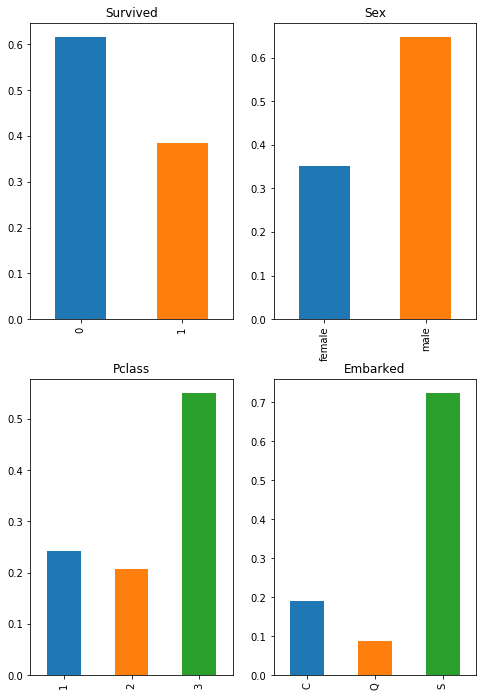

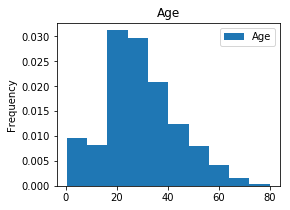

In [9]:
plot_attrs(train_data, [ "Survived", "Sex", "Pclass", "Embarked" ], attr_type="Cat", plot=True)
plot_attrs(train_data, [ "Age" ], attr_type="Num")   

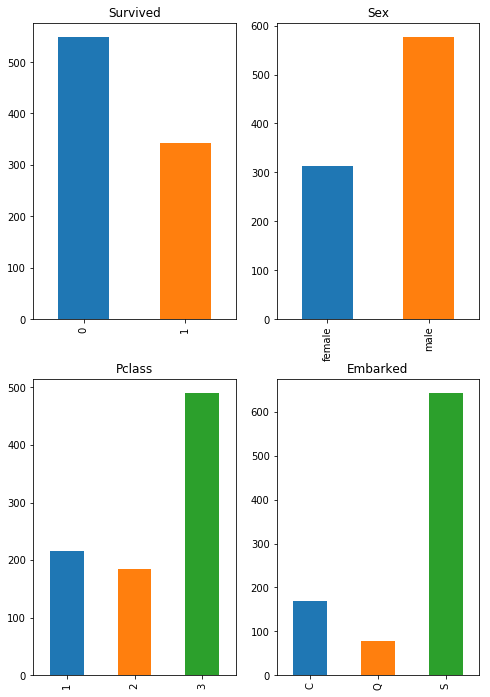

In [10]:
plot_attrs(train_data, [ "Survived", "Sex", "Pclass", "Embarked" ], attr_type="Cat", plot=True, normalize=False)

In [11]:

def plot_cond( df, var, conds, ax, normalize=True):
    """
    Plot probability of a value in column var of DataFrame df, conditional on conditions expressed in conds
    
    Parameters
    ----------
    df: DataFrame
    var: String.  Name of column in df whose density we will plot
    conds: Dictionary
    - keys are Strings, which are names of columns in df
    - values are values that could be compared with column at the key
    
    
    """
    plot_data = df.copy()
    title_array = []
    
    for cond, val in conds.items():
        title_array.append( "{c}={v}".format(c=cond, v=val))
        plot_data = plot_data.loc[ plot_data.loc[:, cond] == val, : ]
        
        args = { "kind": "bar"}
        
    
    plot_data = plot_data.loc[:, var ]
    
    title = ", ".join(title_array)
    title = "Prob({v} | {t})".format(v=var, t=title)
    plot_data.value_counts(normalize=normalize).sort_index().plot(title=title, ax=ax, **args)
    
def plot_conds(df, specs):
    """
    Print multiple conditional plots using plot_cond
    
    Parameters
    -----------
    df: DataFrame
    specs: List. Each element of the list is a tuple (var, conds)
    -  each element of the list generates a call to plot_cond(df, var, conds)
    """
    num_specs = len(specs)
    ncols=3
    nrows = max(1,round(.4999 + num_specs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_specs*1.5))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_specs == 1:
        axes =np.array( [ axes ])
        
    for i, spec in enumerate(specs):
        if spec is None:
            continue
        (var, conds) = spec
        plot_cond(df, var, conds, ax=axes.flatten()[i])

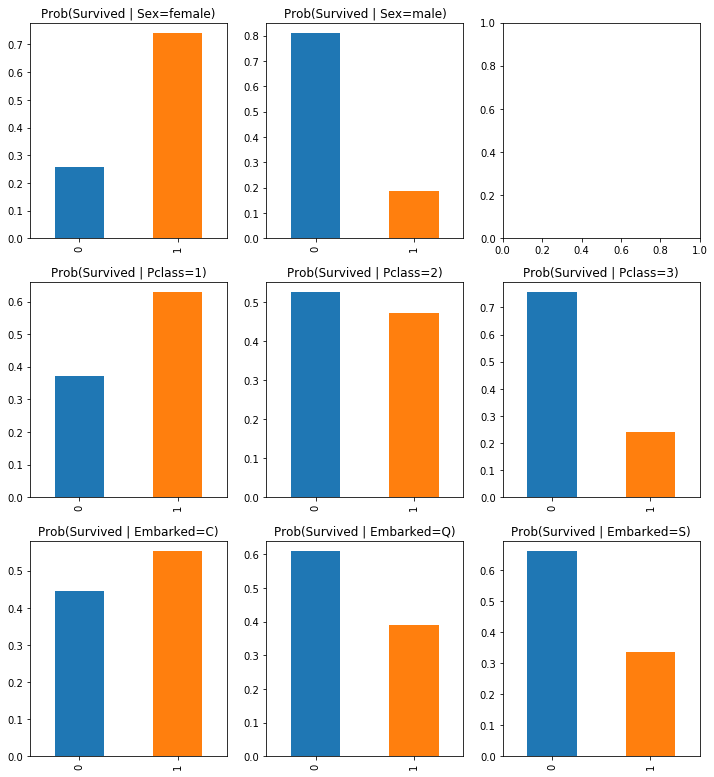

In [12]:
plot_conds(train_data, [ ("Survived", { "Sex": "female"}),
                         ("Survived", { "Sex": "male"}),
                         None,
                         ("Survived", { "Pclass": 1}),
                         ("Survived", { "Pclass": 2}),
                         ("Survived", { "Pclass": 3}),
                        
                         ("Survived", { "Embarked":"C"}),
                         ("Survived", { "Embarked":"Q"}),
                         ("Survived", { "Embarked":"S"}),
                       ]
          )

# Making pipeline for numerical data

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
#fit: doesn't do anything and just return to the original DataFrame
# transform: transfer DataFrame into Series
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):                            
        return X[self.attribute_names]



from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

num_features = ["Age", "SibSp", "Parch", "Fare"] #numerical features

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( num_features )), #set the parameter for DataDrameSelector
        ("imputer", SimpleImputer(strategy="median")),         #set the parameter for SimpleImputer, Use median for the missing value
    ])

# Making pipeline for non-numerical data

To correctly deal with the catogorical data:
- transfer categorical data into dummy variables
- delete one of dummy variables for each category

The second step is to reduce colinearity of the dummy variables: eliminating one of the dummy variable is a way to cut down colinearity/

In [14]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

class droplastcolumn(BaseEstimator, TransformerMixin):
    
        self.whichcolumn = whichcolumn
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.delete(X, self.whichcolumn, 1)
    
class SexToInt(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

        
        sex = X["Sex"]
        X["Sex"] = 0
        X[ sex == "female" ] = 1
        
        return(X)
    
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

cat_features = [ "Pclass" ]
sex_features = [ "Sex" ]

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_features )),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
       ("drop_one_of_dummy",droplastcolumn(-1)),
    ])

sex_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( sex_features )),
        ("imputer", MostFrequentImputer()),
        ("SexToInt", SexToInt()),
    ])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("sex_pipeline", sex_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])



In [15]:
X_train=preprocess_pipeline.fit_transform(train_data) #it is a ndarray
X_train.shape #each column refers to  ["Age", "SibSp", "Parch", "Fare"] ["Sex"]["Dum_Pclass_1","Dum_ Pclass_2"]



(891, 7)

In [16]:
X_train[0]

array([22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ,  0.  ])

In [17]:
X_train_index = ["Age", "SibSp", "Parch", "Fare","Sex","Dum_Pclass_1","Dum_ Pclass_2"]

In [18]:
y_train = train_data["Survived"]

# Baseline Model

**There are two reasons why I choose most_frequent model as baseline model here:**
- First is that the model has highest accuracy among all the baseline models
- Another is that most frequent model tells us how the data is biased. Comparing this accuracy with later models, we can know how much we improve by using better models

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="most_frequent")
acc_scores_dmy = cross_val_score(dmy_clf, X_train, y_train, cv=5, scoring="accuracy")
SCORE_BASELINE =  acc_scores_dmy
print("{s}: Accuracy = {a:.4f}".format(s="Baseline Model most_frequent", a=acc_scores_dmy.mean()))

Baseline Model most_frequent: Accuracy = 0.6162


# Experiment 1

I will use Logistic Model and 5-fold cross validation.

In [20]:
from sklearn import linear_model, preprocessing, model_selection 
from sklearn.ensemble import RandomForestClassifier

logistic_clf = linear_model.LogisticRegression(solver='liblinear')


***To evaluate the model, accuracy is used***

In [21]:
SCORE_1 = cross_val_score(logistic_clf, X_train, y_train, cv=5, scoring = "accuracy")
SCORE_1 = SCORE_1.mean()
SCORE_1

0.7868160254657532

In [22]:
print("{s}: Accuracy = {a:.4f}".format(s="Experiment_1 Model  ", a=SCORE_1.mean()))

Experiment_1 Model  : Accuracy = 0.7868


In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, svm, metrics
from sklearn.metrics import precision_recall_curve
expected_1 = y_train
predicted_1 = cross_val_predict(logistic_clf, X_train, y_train, cv=5)

confusion_mat_1 = metrics.confusion_matrix(expected_1, predicted_1)

In [24]:
# %load mnist_plot_confusion.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # -  coordinates are (horizontal offset, vertical offset)
        # -  so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


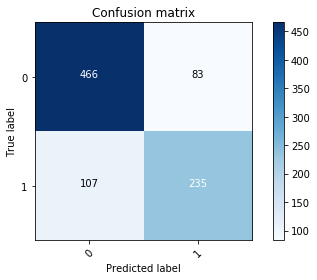

In [25]:
plot_confusion_matrix(confusion_mat_1, range(2))

## Displaying the missclassified label

Create a function to find missclassified pessengers and display first 10 of them for MISCLASSIFIED_SURVIVE, MISCLASSIFIED_NOT_SURVIVE

In [26]:

def Find_miss(expected, predicted):
    MISCLASSIFIED_SURVIVE=[] #Create empty list to append missclassified index number
    MISCLASSIFIED_NOT_SURVIVE=[] #Create empty list to append missclassified index number
    sum_ =  np.array(expected)+np.array(predicted) # Take a sum of predicted group and expected group, if the sum ==1, then its missclassified
    all_mis = np.argwhere(sum_==1)                 #misclassified ones are stored in all_mis in form of nparray of nparray,flatten it first
    all_mis = all_mis.flatten()
    for i,item in enumerate(all_mis):              
        if predicted[item]==1:
            MISCLASSIFIED_SURVIVE.append(item)
        else:
            MISCLASSIFIED_NOT_SURVIVE.append(item)
    return (MISCLASSIFIED_SURVIVE, MISCLASSIFIED_NOT_SURVIVE) #return to two lists
 

In [27]:
MISCLASSIFIED_SURVIVE_1, MISCLASSIFIED_NOT_SURVIVE_1 = Find_miss(expected_1, predicted_1)
len(MISCLASSIFIED_SURVIVE_1)

83

In [28]:
len( MISCLASSIFIED_NOT_SURVIVE_1)

107

In [29]:
print('\033[1m' + "This chart below presents the firts 10 missclassfied pessengers' data(Missclassified as survive):")
train_data.iloc[MISCLASSIFIED_SURVIVE_1[0:10],:]

This chart below presents the firts 10 missclassfied pessengers' data(Missclassified as survive):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S


In [30]:
print('\033[1m' + "This chart below presents the firts 10 missclassfied pessengers' data(Missclassified as not survive):")
train_data.iloc[MISCLASSIFIED_NOT_SURVIVE_1[0:10],:]

This chart below presents the firts 10 missclassfied pessengers' data(Missclassified as not survive):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S


# Experiment 2

### Putting age into buckets

In this model, I will still use logistic model. But a different pipeline for data preprocessing.

We can't use age as numerical data for regression model. In experiment 2, we will assign age into several backets and then treat them as categorical data(turn them into dummy varaiable and then drop a column)

**Create a class to transform numerical age into Categorical data**

In [31]:
# Class to turn numerical continuous Age into categorical data
# Parameter n refers to the length of interval of each bucket
# the bucket starts from 0 and is designed to include the max of age in the largesy bucket
class Age_bucket(BaseEstimator, TransformerMixin):
    def __init__(self, n):
        self.n = n
    def fit(self, X, y=None):
        return self
    def transform(self, X):       #
        age = X.flatten()
        
        out = []                   #define a list to store transformed data for age
        num = int(np.ceil(age.max()/self.n))    # find out how many buckets we need
    
        for i,item in enumerate(age):
            for j in np.arange(num):
                if item<((j+1)*self.n):
                    out.append(j)
                    break
        out = pd.Series(out)
        return np.array(out).reshape(-1,1)

### Make a pipeline for Age (Age Buckets)

Create a pipeline for age transformation by using the class defined just now

**Disccussion: I choose 15 as the length of each interval, because I will think under 15 years old children are similar. 15-30 similar. We can't divide age into too many small buckets, since it might cause overfitting problem.**

In [32]:
num_features_age = ["Age"]
age_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_age )), #set the parameter for DataDrameSelector
        ("imputer", SimpleImputer(strategy="median")),         #set the parameter for SimpleImputer, Use median for the missing value
        ("Agebucket",  Age_bucket(n =15)),
        ("cat_encoder", OneHotEncoder(sparse=False)),
        ("drop_one_of_dummy",droplastcolumn(-2)),              #drop the second last column, can't just drop last column
                                                               #Because last column might only have a few ones.After 
                                                               # droping it,we might still have colinearity
    ])

### Make a pipeline for other numerical data

In [33]:
num_features_2 = [ "SibSp", "Parch", "Fare"] #numerical features

num_pipeline_2 = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_2 )), #set the parameter for DataDrameSelector
        ("imputer", SimpleImputer(strategy="median")),         #set the parameter for SimpleImputer, Use median for the missing value
    ])

### FeatureUnion using numerical_2, Age pipeline and previous two categorical pipline

In [34]:
preprocess_pipeline_2 = FeatureUnion(transformer_list=[
        ("num_pipeline_2", num_pipeline_2),
        ("age_pipeline", age_pipeline),
        ("sex_pipeline", sex_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### Processing data and making predictions

In [35]:
X_train_2 = preprocess_pipeline_2.fit_transform(train_data)
y_train_2  = train_data["Survived"]
X_train_2.shape

(891, 11)

In [36]:
SCORE_2 = cross_val_score(logistic_clf, X_train_2, y_train_2, cv=5, scoring = "accuracy")
SCORE_2 = SCORE_2.mean()
SCORE_2

0.7957166977505749

**Discussion: Assigning age into buckets helps improve the score. There is an intuitive way to understand this: old people and children will be in priority and they will have more possiblities to live. However, if age treated as one numerical variable, this large age effect might offset young age effect in linear model.**

In [37]:
expected_2 = y_train_2
predicted_2 = cross_val_predict(logistic_clf, X_train_2, y_train_2, cv=5)

confusion_mat_2 = metrics.confusion_matrix(expected_2, predicted_2)

Confusion matrix, without normalization


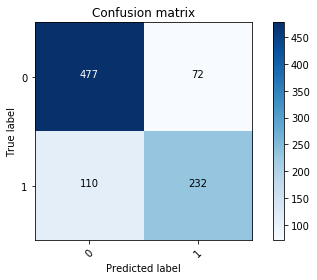

In [38]:
plot_confusion_matrix(confusion_mat_2, range(2))

In [39]:
MISCLASSIFIED_SURVIVE_2, MISCLASSIFIED_NOT_SURVIVE_2 = Find_miss(expected_2, predicted_2)
train_data.iloc[MISCLASSIFIED_SURVIVE_2[0:10],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [40]:
train_data.iloc[MISCLASSIFIED_NOT_SURVIVE_2[0:10],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S


# Extra credit problem

**Featuren Engineering**
- Using numerical_pipeline_3, inlude "Fare"
- Using age_pipeline, include Age
- Using sex_pipeline, include Sex
- Using catgorical_pipeline, include Pclass
- Using famliy_size_pipeline, include family size

In [41]:
num_features = [ "Fare"] #numerical features

num_pipeline_3 = Pipeline([
        ("select_numeric", DataFrameSelector( num_features )), #set the parameter for DataDrameSelector
        ("imputer", SimpleImputer(strategy="median")),         #set the parameter for SimpleImputer, Use median for the missing value
    ])



In [42]:
# Famliy size pipeline
features = ["SibSp", "Parch"]

class family_size(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        out = X[features[0]]+X[features[1]]
        return np.array(out).reshape(-1,1)
family_size_pipeline =  Pipeline([
        ("family_size", family_size(features)), 
        ("cat_encoder", OneHotEncoder(sparse=False)),
        ("drop_one_of_dummy",droplastcolumn(-3)),
       
    ])

In [43]:
preprocess_pipeline_3 = FeatureUnion(transformer_list=[
        ("num_pipeline_3", num_pipeline_2),
        ("age_pipeline", age_pipeline),
        ("sex_pipeline", sex_pipeline),
        ("cat_pipeline", cat_pipeline),
        ("family_size_pipeline ",family_size_pipeline ),
    ])

In [44]:
X_train_3 = preprocess_pipeline_3.fit_transform(train_data)
y_train_3 = train_data["Survived"]

In [45]:
SCORE_3 = cross_val_score(logistic_clf, X_train_3, y_train_3, cv=5, scoring = "accuracy")
SCORE_3 = SCORE_3.mean()
SCORE_3

0.8069968760051734

**Comparing with experiment 1 and 2, combining "SibSp", "Parch" can make more contribution to the final accuracy**

Family size is a helpful feature to logistic model